In [ ]:
# importing some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
mydata= pd.read_csv ("/content/CARDIO DATA.zip")
mydata.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
mydata.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


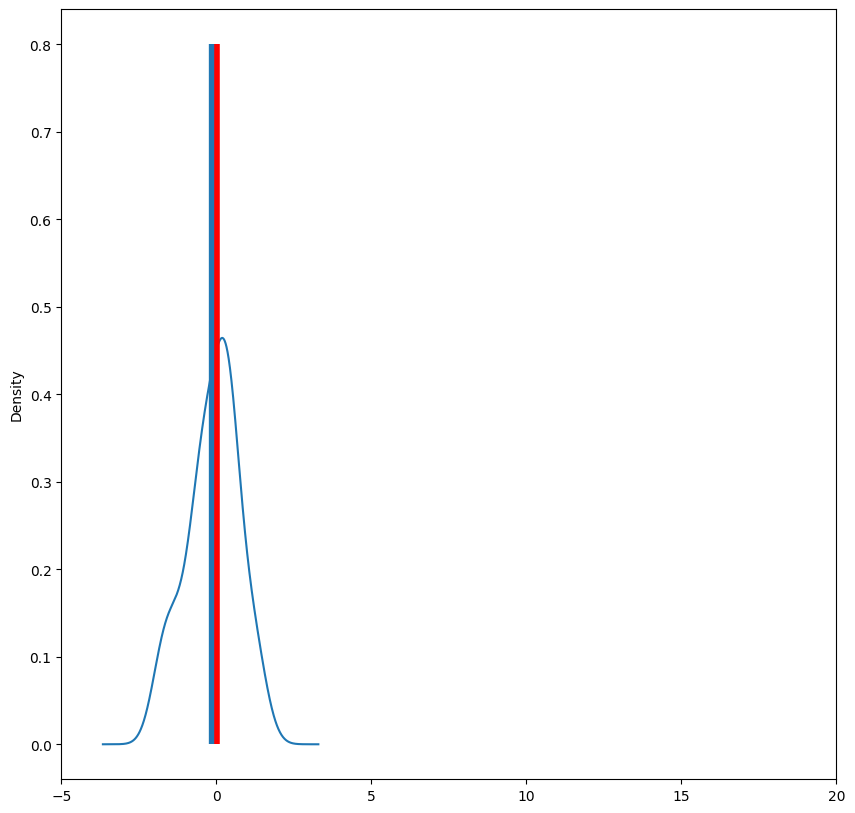

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate data
normaldis_data = np.random.normal(size=60)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((normaldis_data, outliers), axis=0))

# Convert normaldis_data to a Pandas Series
normaldis_data_series = pd.Series(normaldis_data)

# Plot the density of the normaldis_data_series
normaldis_data_series.plot(kind="density", figsize=(10, 10), xlim=(-5, 20));

# Plot the vertical lines for the mean and median
plt.vlines(normaldis_data_series.mean(), ymin=0, ymax=0.8, linewidth=6.0);
plt.vlines(normaldis_data_series.median(), ymin=0, ymax=0.8, linewidth=4.0, color="red");

# Show the plot
plt.show()

In [ ]:
#calculating IQR
mydata["Age"].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

In [ ]:
mydata["Miles"].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

In [ ]:
import pandas as pd
five_num = {
    'Minimum': mydata["Age"].quantile(0),   # Minimum
    'First Quartile': mydata["Age"].quantile(0.25), # 25th Percentile
    'Median': mydata["Age"].quantile(0.50), # Median
    'Third Quartile': mydata["Age"].quantile(0.75), # 75th Percentile
    'Maximum': mydata["Age"].quantile(1)    # Maximum
}

five_num

{'Minimum': 18.0,
 'First Quartile': 24.0,
 'Median': 26.0,
 'Third Quartile': 33.0,
 'Maximum': 50.0}

In [ ]:
#calculating skew
import pandas as pd

mydata["Age"].skew()

0.9821608255301499

In [ ]:
#calculating IQR
IQR= mydata["Age"].quantile(0.75) - mydata["Age"].quantile(0.25)
print(IQR)

9.0


In [ ]:
#calculating kurtosis
mydata["Age"].kurt()

0.40970995683644373

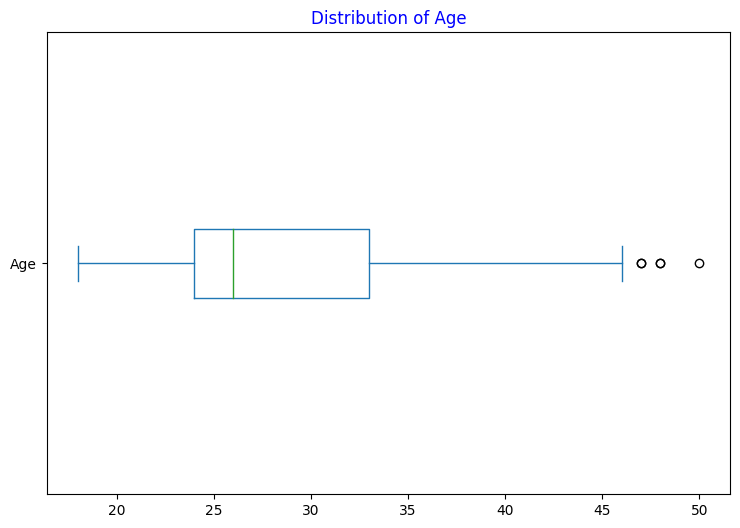

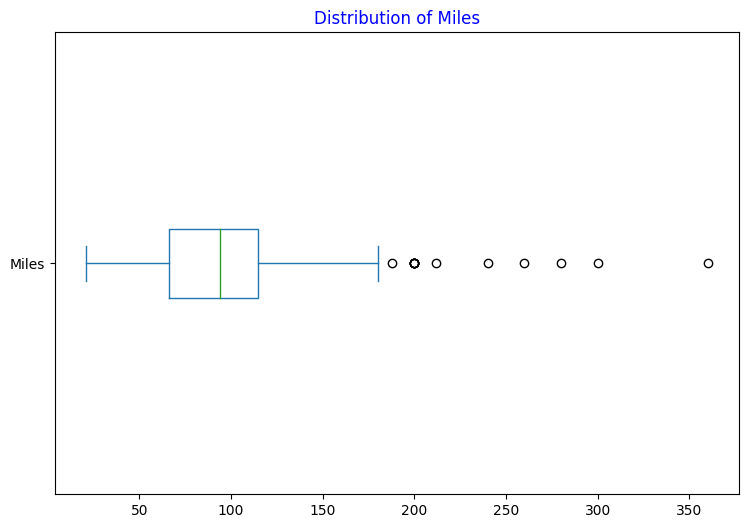

In [ ]:
# drawing box plot  for age
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
mydata["Age"].plot(kind="box", vert=False)

plt.title('Distribution of Age', color="blue")
plt.show()

# box plot by miles
plt.figure(figsize=(30,6))
plt.subplot(1,3,2)
mydata["Miles"].plot(kind="box", vert=False)

plt.title('Distribution of Miles', color="blue")
plt.show()


<Axes: xlabel='Age', ylabel='Miles'>

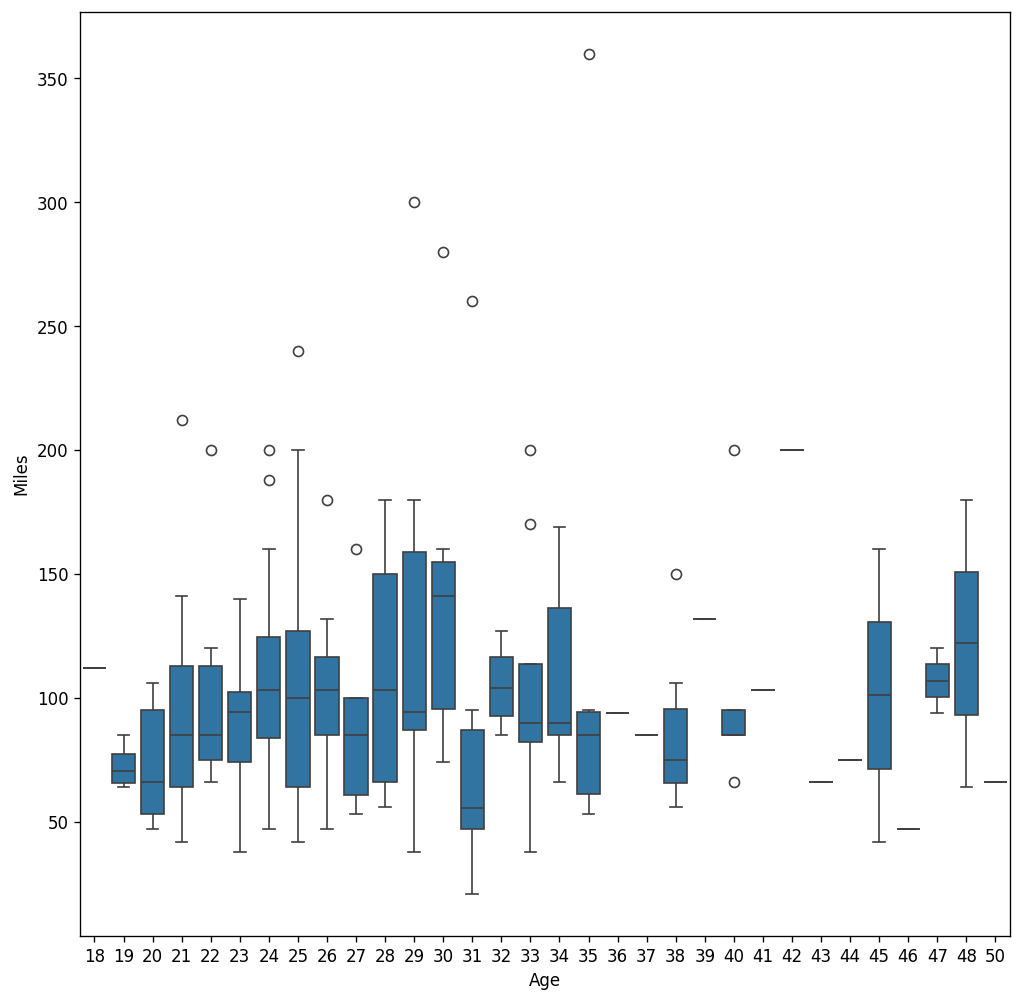

In [ ]:
plt.figure(dpi = 120,figsize= (10,10))
sns.boxplot(x=mydata["Age"],y=mydata["Miles"],data=mydata)

In [ ]:
import numpy as np

# calculating outliers byy age
q25,q75=np.percentile(mydata["Age"],25),np.percentile(mydata["Age"],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in mydata["Age"] if i < lower or i > upper]

print('{} Total Number of outliers in Age: {}'.format('\033[1m',len(Outliers)))

 # calculating outliers by miles
q25,q75=np.percentile(mydata["Miles"],25),np.percentile(mydata["Miles"],75)
IQR=q75-q25
Threshold=IQR*1.5
lower,upper=q25-Threshold,q75+Threshold
Outliers=[i for i in mydata["Miles"] if i < lower or i > upper]

print('{} Total Number of outliers in Miles: {}'.format('\033[1m',len(Outliers)))

 Total Number of outliers in Age: 5
 Total Number of outliers in Miles: 13


In [ ]:
# Hypothesis Testing

# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(mydata["Miles"], mydata["Miles"].mean())

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Test statistic: 0.0
p-value: 1.0
Fail to reject the null hypothesis.


In [ ]:
from statsmodels.stats import weightstats as stests
#Z Test

ztest ,propability_value = stests.ztest(mydata["Age"], x2=None, value=mydata["Age"].mean())
print("p-value:", float(propability_value))
if propability_value<0.05:
    print("Reject the null hypothesis , Alternative hyphothesis accepted")
else:
    print("Fail to reject the null hypothesis , Alternative hyphothesis rejected")

p-value: 1.0
Fail to reject the null hypothesis , Alternative hyphothesis rejected
